<center>
<h1> SOLUCIÓN TAREA 5</h1>
<h3>Diego Godoy Rojas & Luis Carlos Diaz </h3>
</center>

Empezamos importando las librerias y funciones necesarias:

In [1]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import cheby1,convolve2d,fftconvolve
from skimage import exposure

Trabajaremos con dos imagenes una real y una sintetica:

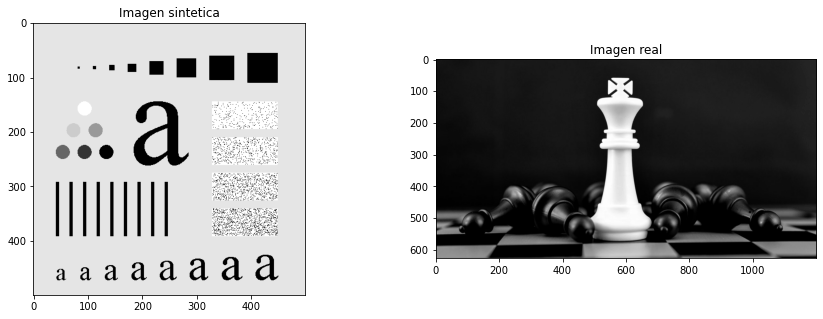

In [232]:
img_s = cv2.imread('fig/sin.tif',0) 
img_r = cv2.imread('fig/aje.jpg',0)
plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.title('Imagen sintetica')
plt.imshow(img_s,cmap='gray')
plt.subplot(122)
plt.title('Imagen real')
plt.imshow(img_r,cmap='gray');

<h1>FILTRO CHEBYSHEV TIPO 1</h1>

Empezamos definiendo el filtro Chebyshev tipo 1 pasa bajos:

In [233]:
def cheby_1_2d_lp(shape, f, n, rp ,pxd=1): 
    """Diseña un filtro Chebyshev 2D pasabajos de orden n 
    con frecuencia de corte f. pxd define el número de píxeles 
    por unidad de frecuencia (por ejemplo, grados de ángulo visual)."""
    pxd = float(pxd)
    rows, cols = shape 
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    coef = np.cosh(n*(1/np.cosh(radius/f)))
    filt = 1 / np.sqrt(1.0 + ((radius/f)*(rp*coef)**2))
       
    return filt

Posteriormente definimos los filtros pasa banda y pasa altos a partir del filtro pasabajos ya definido:

In [234]:
def cheby_1_2d_bp(shape, cutin, cutoff, n, rp,pxd=1):
    """Diseña un filtro Chebyshev Tipo 1 de 2D pasa bandas de orden n
    con frecuencias de corte laterales. pxd define el número de píxeles por unidad de frecuencia
    (por ejemplo, grados de ángulo visual)."""
    return cheby_1_2d_lp(shape,cutoff,n,rp,pxd) - cheby_1_2d_lp(shape,cutin,n,rp,pxd)
 
def cheby_1_2d_hp(shape, f, n, rp,pxd=1):
    """Designs an n-th order highpass 2D Butterworth filter with cutin
    frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
    degrees of visual angle)."""
    return 1. - cheby_1_2d_lp(shape, f, n, rp,pxd)

Probamos nuestro filtro pasabajos para distintas frecuencias de corte:

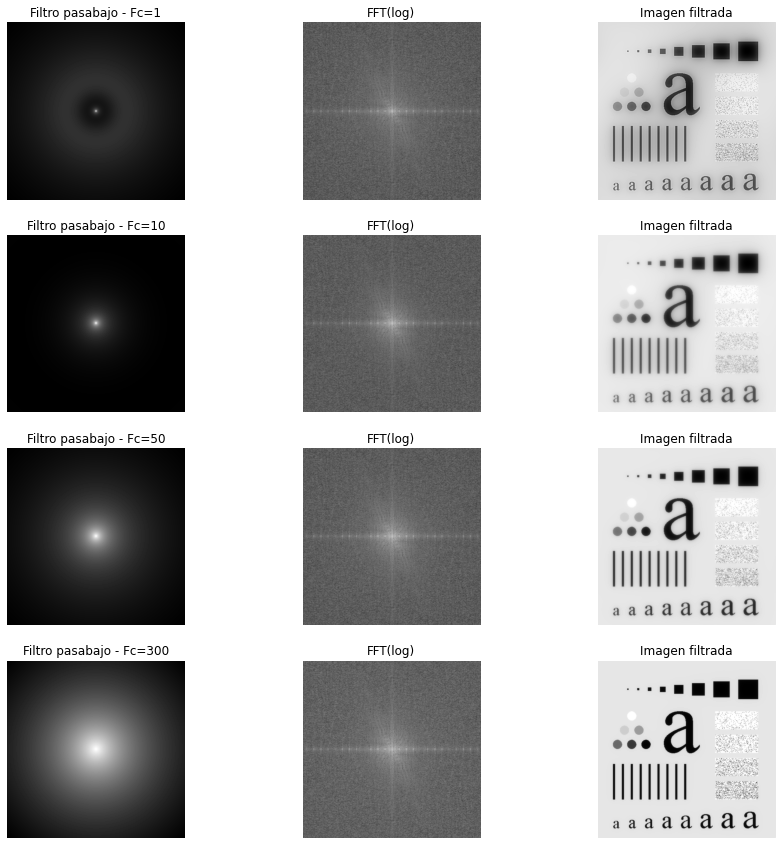

In [235]:
frecuencias = [1,10,50,300]
contador = 0
orden = 2 

for i in frecuencias:
    orig_image = img_s
    fft_orig = np.fft.fftshift(np.fft.fft2(orig_image))

    filt = cheby_1_2d_lp(orig_image.shape, i, orden, 3,43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    
    contador = contador+1
    plt.figure(1,figsize=[15,15])
    plt.subplot(4,3,contador)
    plt.title(f'Filtro pasabajo - Fc={i}')
    plt.imshow(filt)
    plt.gray()
    plt.axis('off')
    contador = contador+1
    plt.subplot(4,3,contador)
    plt.title('FFT(log)')
    plt.imshow(np.log(np.abs(fft_new)))
    plt.gray()
    plt.axis('off')
    contador = contador+1
    plt.subplot(4,3,contador)
    plt.title('Imagen filtrada')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')

Podemos observar que a medida que aumenta la frecuencia de corte de nuestro filtro pasabajos conservamos mas información de la imagen original por lo tanto su calidad sera mejor. Para menores frecuencias la imágen se ve borrosa, lo que indica perdida de detalles que se encuentran en altas frecuencias.

Ahora probamos nuestro filtro pasa altos para distintas frecuencias de corte:

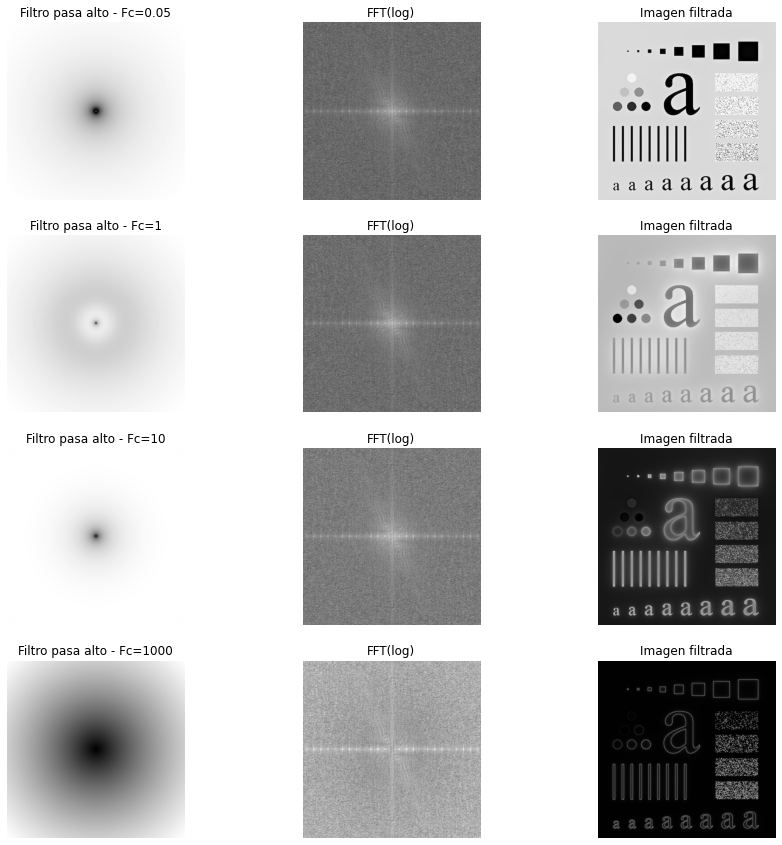

In [238]:
frecuencias = [0.05,1,10,1000]
contador = 0
orden=2
for i in frecuencias:
    orig_image = img_s
    fft_orig = np.fft.fftshift(np.fft.fft2(orig_image))

    filt = cheby_1_2d_hp(orig_image.shape, i, orden, 3, 43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    
    contador = contador+1
    plt.figure(1,figsize=[15,15])
    plt.subplot(4,3,contador)
    plt.title(f'Filtro pasa alto - Fc={i}')
    plt.imshow(filt)
    plt.gray()
    plt.axis('off')
    contador = contador+1
    plt.subplot(4,3,contador)
    plt.title('FFT(log)')
    plt.imshow(np.log(np.abs(fft_new)))
    plt.gray()
    plt.axis('off')
    contador = contador+1
    plt.subplot(4,3,contador)
    plt.title('Imagen filtrada')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')

En esta ocasión vemos como a medida que aumentamos la frecuencia de corte vamos perdiendo información de la imagen original y van quedando los detalles de alta frecuencia.

Probamos nuestro filtro pasa bandas para distintas frecuencias de corte:

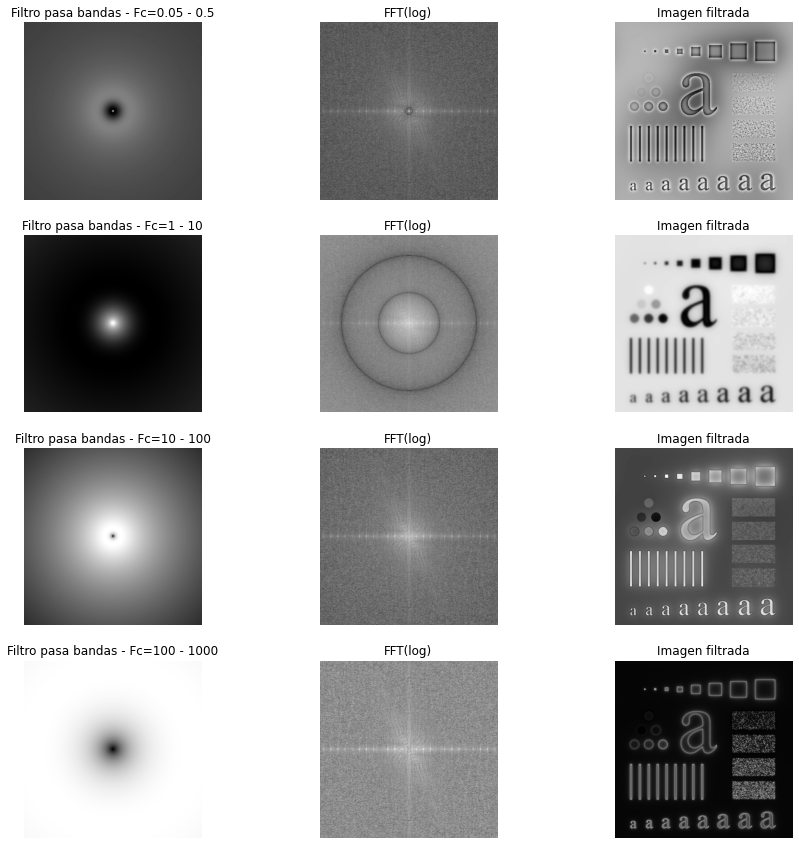

In [239]:
frecuencias=[0.05,1,10,100]
contador = 0
for i in frecuencias:
    orig_image = img_s
    fft_orig = np.fft.fftshift(np.fft.fft2(orig_image))
    filt = cheby_1_2d_bp(orig_image.shape,i,i*10, 2, 3, 43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    
    contador = contador+1
    plt.figure(1,figsize=[15,15])
    plt.subplot(4,3,contador)
    plt.title(f'Filtro pasa bandas - Fc={i} - {i*10}')
    plt.imshow(filt)
    plt.gray()
    plt.axis('off')
    contador = contador+1
    plt.subplot(4,3,contador)
    plt.title('FFT(log)')
    plt.imshow(np.log(np.abs(fft_new)))
    plt.gray()
    plt.axis('off')
    contador = contador+1
    plt.subplot(4,3,contador)
    plt.title('Imagen filtrada')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')

Ahora aplicaremos nuestro filtro diseñado a imagenes reales para ver su comportamiento, empezando por el filrto pasabajo:

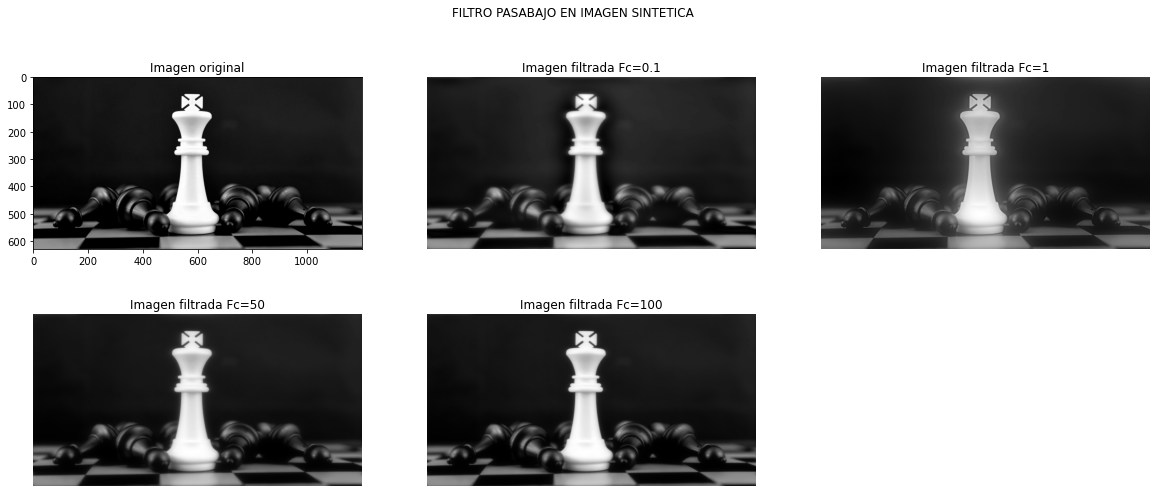

In [243]:
frecuencias = [0.1,1,50,100]
contador = 1
orden = 2
for i in frecuencias:
    orig_image = img_r
    fft_orig = np.fft.fftshift(np.fft.fft2(orig_image))

    filt = cheby_1_2d_lp(orig_image.shape, i, orden, 3,43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    plt.figure(1,figsize=[20,8])
    plt.suptitle('FILTRO PASABAJO EN IMAGEN SINTETICA')
    if contador == 1:
        plt.subplot(2,3,1)
        plt.title(f'Imagen original')
        plt.imshow(orig_image)
    contador = contador+1
    plt.subplot(2,3,contador)
    plt.title(f'Imagen filtrada Fc={i}')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')

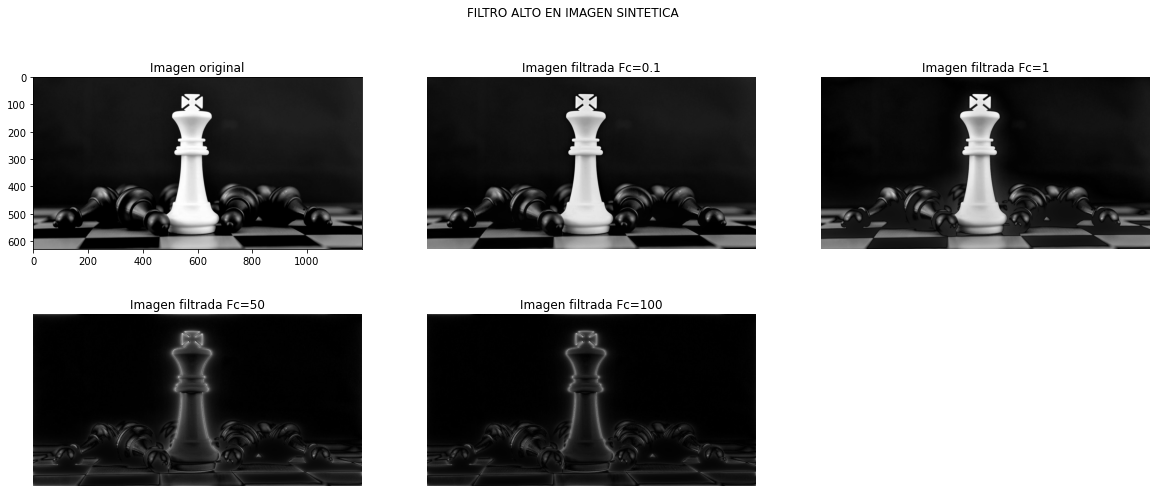

In [245]:
frecuencias = [0.1,1,50,100]
contador = 1
orden = 2
for i in frecuencias:
    orig_image = img_r
    fft_orig = np.fft.fftshift(np.fft.fft2(orig_image))
    filt = cheby_1_2d_hp(orig_image.shape, i, orden, 3,43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    plt.figure(1,figsize=[20,8])
    plt.suptitle('FILTRO ALTO EN IMAGEN SINTETICA')
    if contador == 1:
        plt.subplot(2,3,1)
        plt.title(f'Imagen original')
        plt.imshow(orig_image)
    contador = contador+1
    plt.subplot(2,3,contador)
    plt.title(f'Imagen filtrada Fc={i}')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')

<h1>REALCE DE IMAGENES

Para el realce de imágenes se usa el Laplaciano en el espacio, este resalta los bordes y detalles de alta frecuencia que se añaden a la imágen original con el fin de remarcar los bordes. La resta se realiza debido al kernel usado por la función Laplacian de OpenCv.
En el dominio espacial empleando el laplaciano de la imagen tendremos:

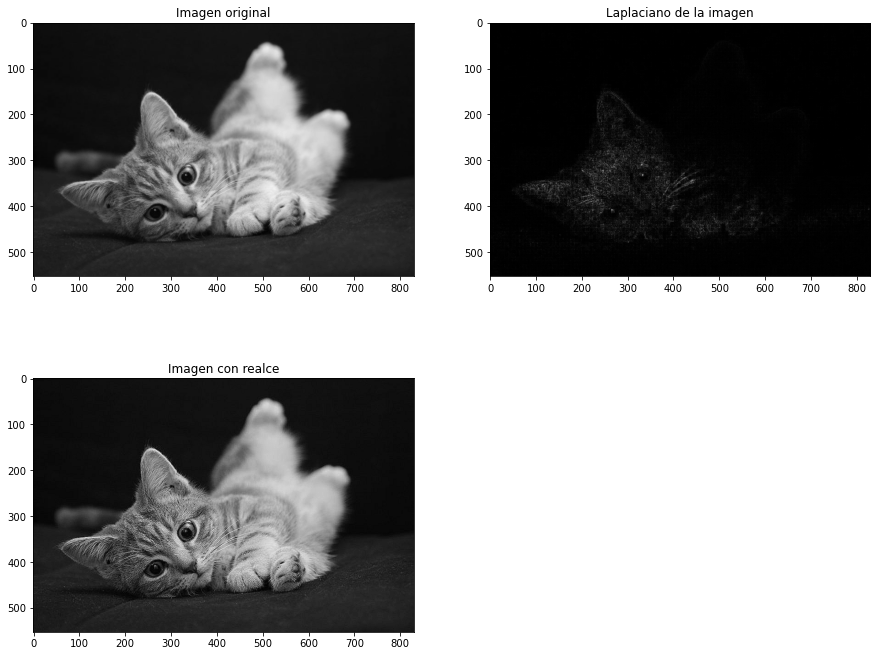

In [256]:
img_g =  cv2.imread('fig/gato.jpg',0)
plt.figure(1, figsize=(15,12))
plt.subplot(221).imshow(img_g, cmap='gray')
plt.title('Imagen original')
plt.subplot(222).imshow(cv2.convertScaleAbs(cv2.Laplacian(img_g,  cv2.CV_16S, 1)), cmap='gray')
plt.title('Laplaciano de la imagen')
plt.subplot(223).imshow(cv2.convertScaleAbs(img_g-cv2.Laplacian(img_g,  cv2.CV_16S, 1)), cmap='gray')
plt.title('Imagen con realce')
plt.show()

En la imágen con realce se puede evidenciar que los detalles en la cara del gato son más pronunciados.
Si ahora lo queremos realizar en el dominio de la frecuencia a partir de la transformada de fourier, se evalua la función de transferencia y se aplica a la imágen para luego devolverla al dominio espacial.

In [259]:
def freqLaplacian(image):
    fft=np.fft.fftshift(np.fft.fft2(image))
    rows, cols = image.shape 
    M=rows/2
    N=cols/2
    for i in range(rows):
        for j in range(cols):
            H =1+((i-M)**2+(j-N)**2)/(M*N)
            fft[i,j]=H*fft[i,j]
    n_img=np.abs(np.fft.ifft2(np.fft.ifftshift(fft)))
    return n_img

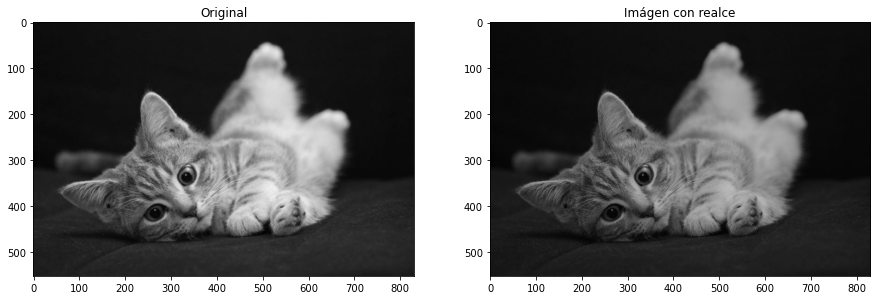

In [263]:
plt.figure(1, figsize=(15,12))
plt.subplot(221).imshow(img_g, cmap='gray')
plt.title('Original')
plt.subplot(222).imshow(freqLaplacian(img_g), cmap='gray')
plt.title('Imágen con realce');

<h1>HIGH BOOST</h1>

Se usa un filtro pasa-altos para extraer los detalles de la imágen y luego se le suman a la señal original multiplicada por un factor para devolver una parte de las bajas frecuencias eliminadas en el filtrado, esto se realizó en el dominio de la frecuencia.

In [264]:
def high_boost(image, A):
    chev=cheby_1_2d_hp(image.shape, 500, 2, 3, 43)
    fft=np.fft.fftshift(np.fft.fft2(image))
    out=((A-1)+chev)*fft
    out=np.fft.ifft2(np.fft.fftshift(out))
    out=np.abs(out)
    return out

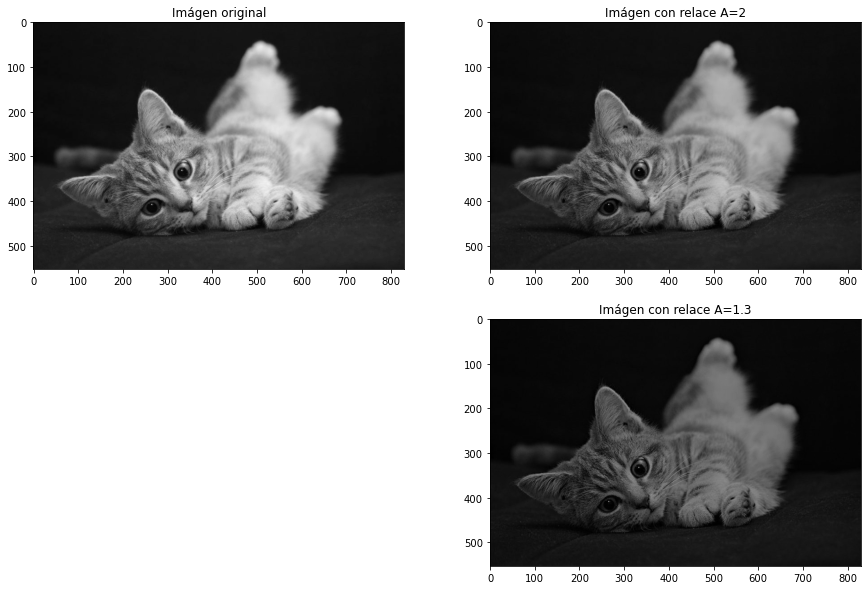

In [274]:
img_m =  cv2.imread('fig/gato.jpg',0)
plt.figure(1, figsize=(15,10))
plt.subplot(221).imshow(img_m, cmap='gray')
plt.title('Imágen original')
plt.subplot(222).imshow(high_boost(img_m, 2), cmap='gray')
plt.title('Imágen con relace A=2')
plt.subplot(224).imshow(high_boost(img_m, 1.3), cmap='gray')
plt.title('Imágen con relace A=1.3');

En el dominio espacial se usa un kernel del Laplaciano para extraer los detalles de alta frecuencia usando la convolución, estos se añaden a la imágen multiplicado por una constante. En la imágenes se puede ver como los cráteres están mas resaltados a medida que se aumenta la constante A.

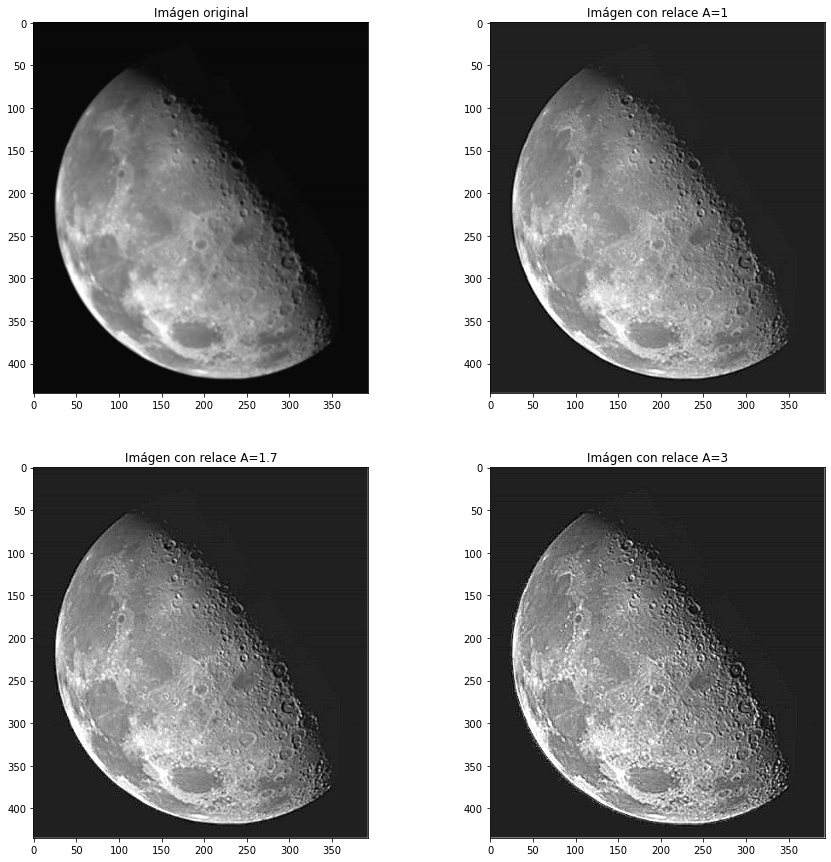

In [277]:
def spatial_high_boost(image, A):
    kernel=[[0,1,0],[1,-4,1],[0,1,0]]
    lap=convolve2d(image, kernel, mode='same')
    return cv2.convertScaleAbs(image-A*lap)

img_m =  cv2.imread('fig/img3.jpg',0)
img_m = img_m
plt.figure(1, figsize=(15,15))
plt.subplot(221).imshow(img_m, cmap='gray')
plt.title('Imágen original')
plt.subplot(222).imshow(spatial_high_boost(img_m, 1), cmap='gray')
plt.title('Imágen con relace A=1')
plt.subplot(223).imshow(spatial_high_boost(img_m, 1.7), cmap='gray')
plt.title('Imágen con relace A=1.7')
plt.subplot(224).imshow(spatial_high_boost(img_m, 3), cmap='gray')
plt.title('Imágen con relace A=3');

<h1>ÉNFASIS EN ALTAS FRECUENCIAS (HFE)

Ahora buscamos acentuar el efecto del realce hecho por las componentes de alta frecuencia de la imagen usando un filtro pasabajos y dos constantes que ponderan las componentes de alta y baja frecuencia, buscando enfatizar en las altas frecuencias.

Realizando el HFE en frecuencia y mostrando una ecualización de histograma para ver mejor el realce de los detalles.

In [202]:
def high_fe(image, a, b):
    chev=cheby_1_2d_lp(image.shape, 1000, 2, 3,43)
    fft=np.fft.fftshift(np.fft.fft2(image))
    out=np.fft.ifft2(np.fft.fftshift((a+b*(1-chev))*fft))
    out=exposure.equalize_hist(np.abs(out))
    return np.abs(out)

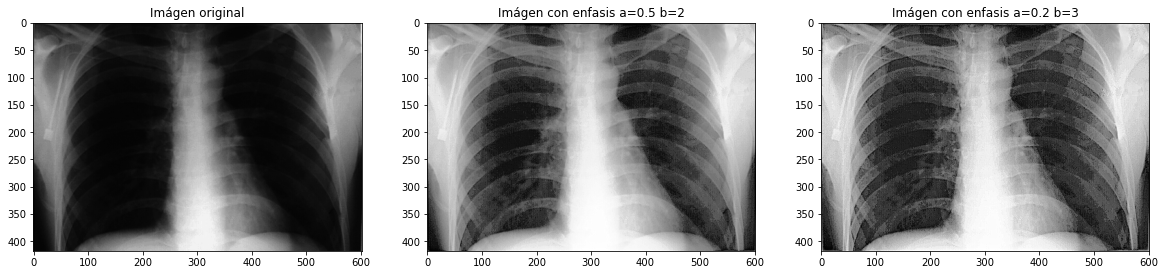

In [283]:
img_x=cv2.imread('fig/rad.tif',0)
plt.figure(1, figsize=(20,10))
plt.subplot(131).imshow(img_x, cmap='gray')
plt.title('Imágen original')
plt.subplot(132).imshow(high_fe(img_x, 0.5, 2), cmap='gray')
plt.title('Imágen con enfasis a=0.5 b=2')
plt.subplot(133).imshow(high_fe(img_x, 0.2, 3), cmap='gray')
plt.title('Imágen con enfasis a=0.2 b=3');

Se realiza un procedimiento similar usando el kernel del Laplaciano.

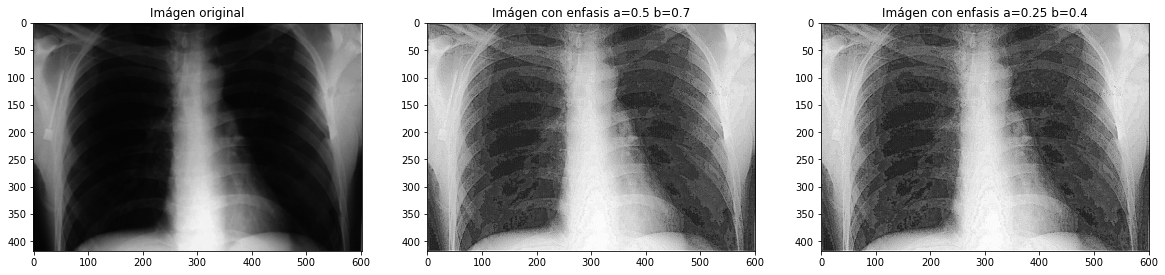

In [288]:
def spatial_high_fe(image, a, b):
    kernel=[[0,1,0],[1,-4,1],[0,1,0]]
    lap=convolve2d(image, kernel, mode='same')
    out=cv2.convertScaleAbs(a*image-b*lap)
    out=exposure.equalize_hist(np.abs(out))
    return out

img_x=cv2.imread('fig/rad.tif',0)
plt.figure(1, figsize=(20,10))
plt.subplot(131).imshow(img_x, cmap='gray')
plt.title('Imágen original')
plt.subplot(132).imshow(spatial_high_fe(img_x, 0.5, 0.7), cmap='gray')
plt.title('Imágen con enfasis a=0.5 b=0.7')
plt.subplot(133).imshow(spatial_high_fe(img_x, 0.25, 0.4), cmap='gray')
plt.title('Imágen con enfasis a=0.25 b=0.4');